<a href="https://colab.research.google.com/github/shahd1995913/Submition/blob/main/Digit_Recognizer/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [**Competitions Link** ](https://www.kaggle.com/competitions/digit-recognizer/leaderboard)

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Run the Kaggle API command to download the dataset
! kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 84.8MB/s]
100% 15.3M/15.3M [00:00<00:00, 110MB/s] 


In [ ]:
# Unzip the downloaded dataset
!unzip -q /content/digit-recognizer.zip

In [ ]:
import pandas as pd
data = pd.read_csv("/content/train.csv")

In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate the count for each class label
class_counts = data['label'].value_counts()

# Display the count for each class label
print(class_counts)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


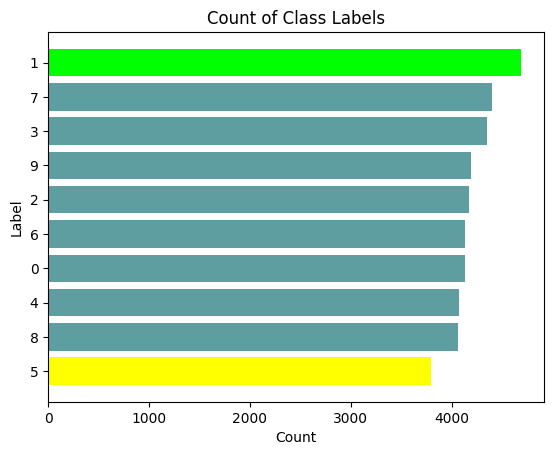

In [ ]:
import matplotlib.pyplot as plt

class_counts = data['label'].value_counts()
class_counts_sorted = class_counts.sort_values(ascending=True)
colors = ['yellow' if c == class_counts_sorted.iloc[0] else 'lime' if c == class_counts_sorted.iloc[-1] else 'cadetblue' for c in class_counts_sorted]
class_labels_sorted = class_counts_sorted.index
plt.barh(range(len(class_labels_sorted)), class_counts_sorted.values, color=colors)
plt.yticks(range(len(class_labels_sorted)), class_labels_sorted)
plt.xlabel('Count')
plt.ylabel('Label')
# Set plot title
plt.title('Count of Class Labels')

# Display the plot
plt.show()

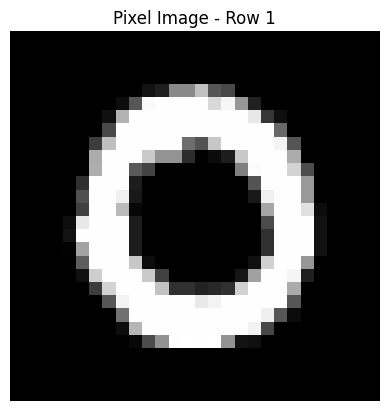

In [ ]:
# Select the row you want to plot
row_index = 1
row_pixels = data.iloc[row_index, 1:]  # Exclude the label column, assuming it's in the first column

# Reshape the pixel values into a 2D array
pixels = row_pixels.values.reshape(28, 28)  # Assuming the images are 28x28 pixels

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(pixels, cmap='gray')

# Remove axis ticks
ax.axis('off')

# Set plot title
plt.title('Pixel Image - Row {}'.format(row_index))

# Display the plot
plt.show()


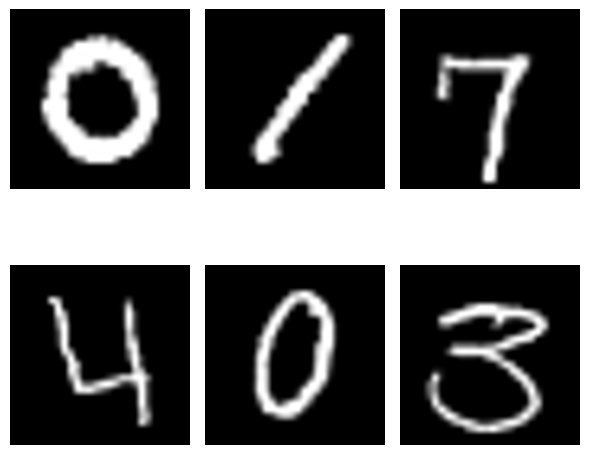

In [ ]:
import numpy as np
from PIL import Image

row_indices = [1, 0, 6, 3, 5, 7]  # Example: plotting specific rows
# Set the number of rows and columns for the plot layout
num_rows = 2
num_cols = 3

# Create a figure and axes for the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 6))

# Loop through the row indices and plot each row
for i, row_index in enumerate(row_indices):
    # Select the row's pixel values
    row_pixels = data.iloc[row_index, 1:]  # Exclude the label column, assuming it's in the first column
    
    # Reshape the pixel values into a 2D array
    pixels = row_pixels.values.reshape(28, 28).astype(np.uint8)  # Assuming the images are 28x28 pixels
    
    # Resize the image to the desired size
    resized_pixels = np.array(Image.fromarray(pixels).resize((300, 300)))
    
    # Plot the image in the corresponding subplot
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(resized_pixels, cmap='gray')
    ax.axis('off')
    # ax.set_title('Label {}'.format(row_index))

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
row_index1

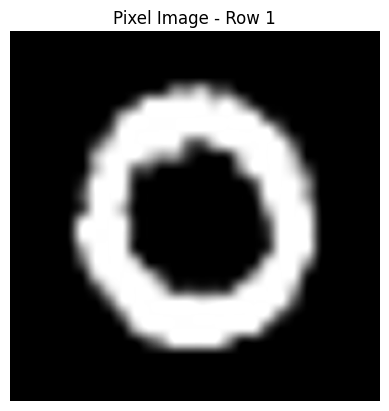

In [ ]:
# Select the row you want to plot
row_index = 1
row_pixels = data.iloc[row_index, 1:]  # Exclude the label column, assuming it's in the first column

# Reshape the pixel values into a 2D array
pixels = row_pixels.values.reshape(28, 28).astype(np.uint8)  # Assuming the images are 28x28 pixels

# Resize the image while maintaining the aspect ratio
image = Image.fromarray(pixels)
image_resized = image.resize((300, 300))

# Convert the resized image back to a NumPy array
resized_pixels = np.array(image_resized)

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(resized_pixels, cmap='gray')

# Remove axis ticks
ax.axis('off')

# Set plot title
plt.title('Pixel Image - Row {}'.format(row_index))

# Display the plot
plt.show()


In [ ]:
after = pd.read_csv("/content/train.csv") 
after
# after.drop('label', axis=1, inplace=True)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have a afterFrame called 'after' with features

# Create an instance of the KMeans algorithm
kmeans = KMeans(n_clusters=10)

# Fit the after to the algorithm
kmeans.fit(after)

# Get the cluster labels for each after point
labels = kmeans.labels_

# Add the cluster labels to the afterFrame
after['Cluster'] = labels

# View the resulting clusters
print(after['Cluster'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    6389
2    6045
5    5284
6    4640
7    4110
1    3986
3    3910
8    3235
9    2213
4    2188
Name: Cluster, dtype: int64


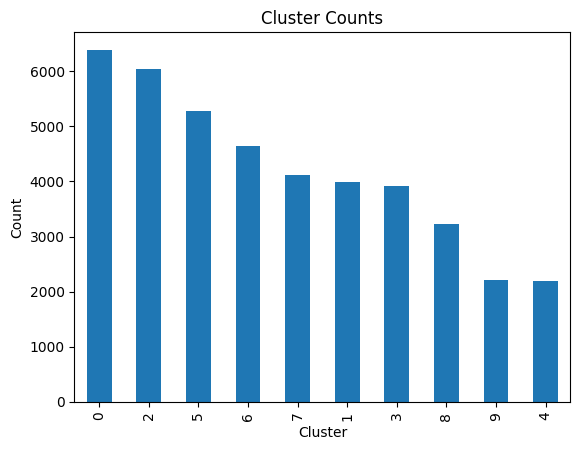

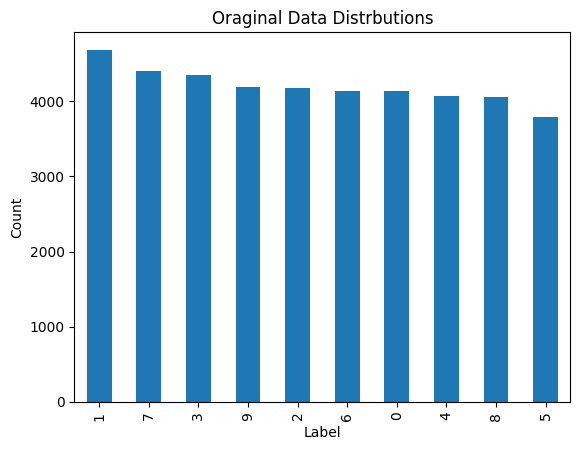

In [ ]:
cluster_counts = after['Cluster'].value_counts()
# Plot the cluster counts
cluster_counts.plot.bar()

# Set the labels and title for the plot
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Counts')

# Display the plot
plt.show()




class_counts = data['label'].value_counts()
class_counts.plot.bar()

# Set the labels and title for the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Oraginal Data Distrbutions')

# Display the plot
plt.show()

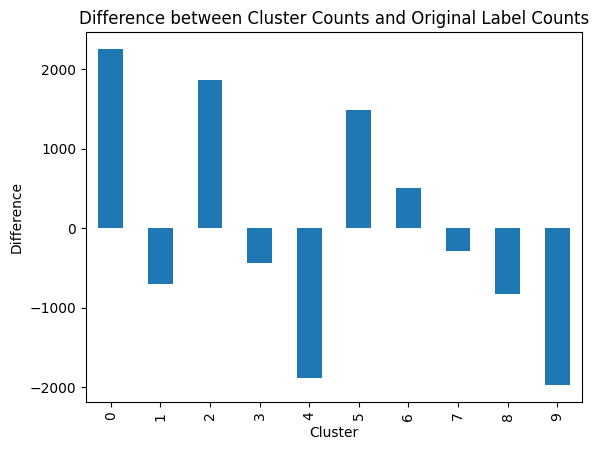

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the cluster counts and original label counts

# Calculate the difference between cluster counts and original label counts
difference = cluster_counts - class_counts

# Plot the difference
difference.plot.bar()

# Set the labels and title for the plot
plt.xlabel('Cluster')
plt.ylabel('Difference')
plt.title('Difference between Cluster Counts and Original Label Counts')

# Display the plot
plt.show()


In [ ]:
import pandas as pd
from scipy.spatial import distance

# Assuming you have the cluster counts and original label counts

# Calculate the Manhattan distance between cluster counts and original label counts
manhattan_distance = distance.cityblock(cluster_counts, class_counts)

# Print the Manhattan distance
print("Manhattan Distance:", manhattan_distance)


Manhattan Distance: 9468


**If your goal is to minimize the difference between the cluster counts and original label counts, then a lower Manhattan distance would be preferable. In that case, a Manhattan distance of 9468 might be considered relatively high.**



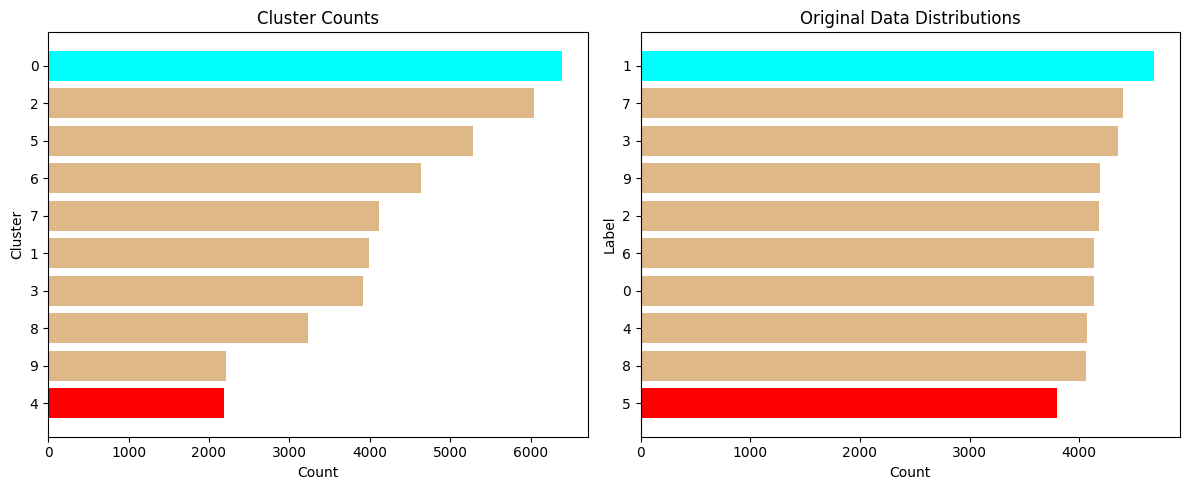

In [ ]:
# Compute the cluster counts and sort them in ascending order
cluster_counts = after['Cluster'].value_counts().sort_values()
cluster_labels_sorted = cluster_counts.index
cluster_counts_sorted = cluster_counts.values

# Compute the original data distributions counts and sort them in ascending order
class_counts = data['label'].value_counts().sort_values()
class_labels_sorted = class_counts.index
class_counts_sorted = class_counts.values

# Define the color for the smallest and largest bars
smallest_color = 'red'
largest_color = 'aqua'

# Assign colors to bars for cluster counts
colors_cluster = ['burlywood' if count != cluster_counts_sorted.min() and count != cluster_counts_sorted.max() else smallest_color if count == cluster_counts_sorted.min() else largest_color for count in cluster_counts_sorted]

# Assign colors to bars for original data distributions
colors_class = ['burlywood' if count != class_counts_sorted.min() and count != class_counts_sorted.max() else smallest_color if count == class_counts_sorted.min() else largest_color for count in class_counts_sorted]

# Create a figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the cluster counts
axes[0].barh(range(len(cluster_labels_sorted)), cluster_counts_sorted, color=colors_cluster)
axes[0].set_yticks(range(len(cluster_labels_sorted)))
axes[0].set_yticklabels(cluster_labels_sorted)
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Cluster')
axes[0].set_title('Cluster Counts')

# Plot the original data distributions
axes[1].barh(range(len(class_labels_sorted)), class_counts_sorted, color=colors_class)
axes[1].set_yticks(range(len(class_labels_sorted)))
axes[1].set_yticklabels(class_labels_sorted)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Label')
axes[1].set_title('Original Data Distributions')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Part 1 use  LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
X = data.drop('label', axis=1)  # Assuming the target column is named 'label'
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as needed

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # You can replace this with any other model you want to use

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9183333333333333


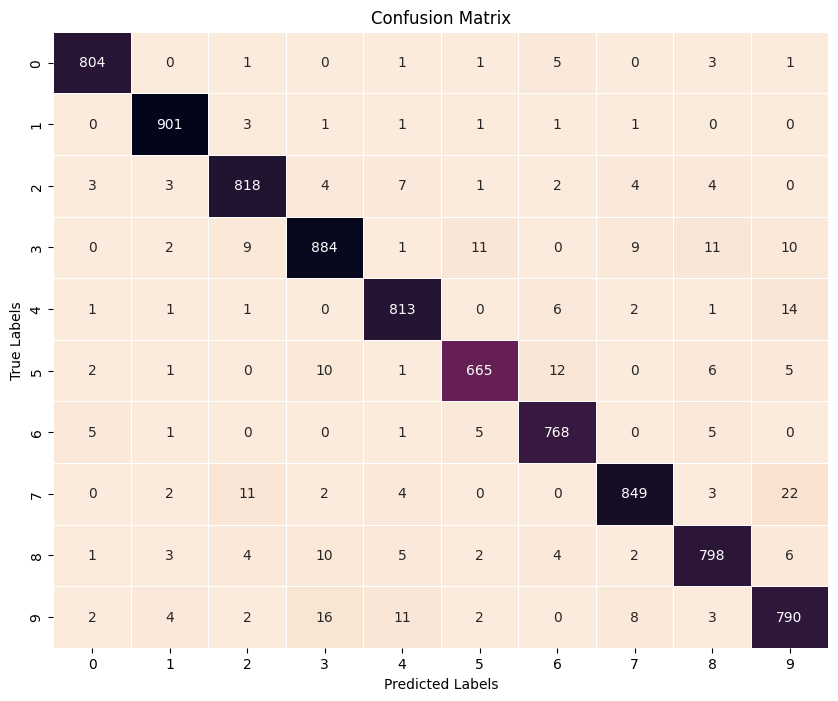

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained y_test (true labels) and y_pred (predicted labels)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the total errors predicted for each class
total_errors = cm.sum(axis=1) - np.diag(cm)

# Create a colormap with red for highlighting the most erroneous cells
cmap = sns.cm.rocket_r

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, linewidths=0.5, linecolor='white', cbar=False)

# Annotate the total errors for each class
for i, err in enumerate(total_errors):
    ax.text(cm.shape[1] + 0.5, i + 0.5, err,
            ha='center', va='center', color='red', fontweight='bold')

# Set the labels and title for the plot
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Set font weight to bold for all the text elements
plt.setp(ax.texts, weight="bold")

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have trained your model and obtained y_test (true labels) and y_pred (predicted labels)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the calculated metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Precision: 0.9631190990891266
Recall: 0.9630952380952381
F1-score: 0.9630717255121232


# Part 2  use  RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForestClassifier = RandomForestClassifier(n_estimators=100)  # Adjust the parameters as needed
model_RandomForestClassifier.fit(X_train, y_train)
y_pred = model_RandomForestClassifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9630952380952381


In [ ]:
test_predictions = model_RandomForestClassifier.predict(test_data)
test_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
test_data = pd.read_csv('/content/test.csv')

# Convert the test data to numpy array
test_data_array = test_data.values

# Make predictions on the test data
test_predictions = model.predict(test_data_array)

# Print the predicted labels
print(test_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[2 0 9 ... 3 9 2]


In [ ]:
# Generate a sequence of numbers for the "ImageId" column
image_ids = np.arange(1, len(test_predictions) + 1)

# Create a DataFrame with "ImageId" and "Label" columns
submission_df = pd.DataFrame({'ImageId': image_ids, 'Label': test_predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission3.csv', index=False)


# Part 3  use Deep learning   **Sequential  model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Preprocess the data and split into training and testing sets
# X is the input features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable if needed
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Reshape the input data
input_shape = X_train.shape[1:]  # Assuming X_train is a numpy array of shape (num_samples, img_width, img_height, num_channels)

# Define the number of output classes
num_classes = len(label_encoder.classes_)

# Build the deep learning model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test_encoded)
print('Accuracy:', accuracy)


Epoch 1/10
1050/1050 [==============================] - 5s 4ms/step - loss: 3.6113 - accuracy: 0.8388
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5109 - accuracy: 0.8856
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3423 - accuracy: 0.9164
Epoch 4/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.3020 - accuracy: 0.9244
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2717 - accuracy: 0.9321
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2356 - accuracy: 0.9388
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2237 - accuracy: 0.9418
Epoch 8/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2104 - accuracy: 0.9480
Epoch 9/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1948 - accuracy: 0.9507
Epoch 10/10
263/263 [==============================] - 1s 2ms/step - loss: 0.3441 

In [ ]:
# Load the test data from a file (e.g., CSV file)
test_data = pd.read_csv('/content/test.csv')
# Make predictions on the test data
test_predictions = model.predict(test_data)

# Get the predicted class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Decode the predicted labels if needed
predicted_labels_decoded = label_encoder.inverse_transform(predicted_labels)

# Print the predicted labels
print(predicted_labels_decoded)

875/875 [==============================] - 2s 3ms/step
[2 0 9 ... 3 9 2]


In [ ]:
len(predicted_labels_decoded)

28000

In [ ]:
# Create a DataFrame for the submission
submission_df = pd.DataFrame({'ImageId': range(1, len(predicted_labels_decoded) + 1),
                              'Label': predicted_labels_decoded})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)